In [1]:
from MDP import MountainCar, CartPole
from RLAlgorithms import ESGNStepSARSA, TrueOnlineSARSALambda
import matplotlib.pyplot as plt

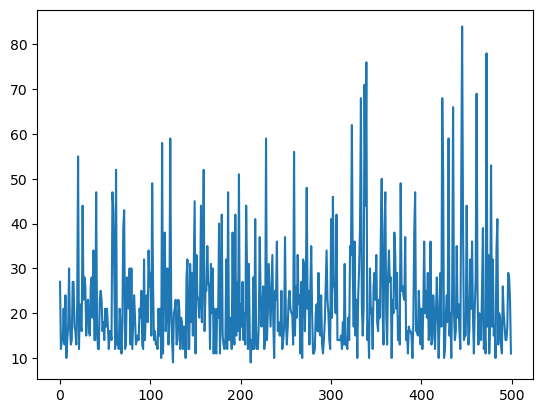

In [4]:
mc = CartPole()
# print(mc.s)
alg = ESGNStepSARSA(mc, M=10, n=2)

Gs = alg.run()

plt.clf()
plt.plot(range(len(Gs)), Gs)

100%|██████████| 2000/2000 [00:30<00:00, 64.67it/s]


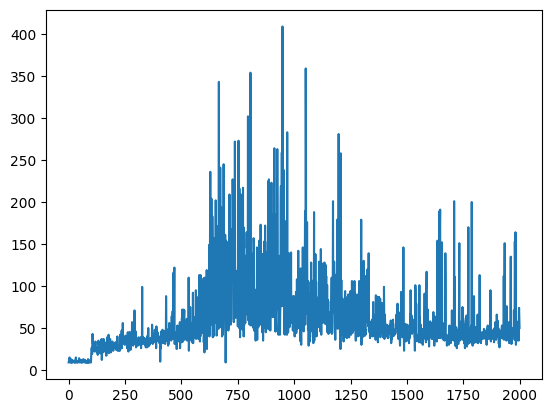

In [2]:
cp = CartPole()
# print(mc.s)
alg = TrueOnlineSARSALambda(cp, M=10)

Gs = alg.run()

plt.clf()
plt.plot(range(len(Gs)), Gs)

In [8]:
Gs

[14.0,
 18.0,
 12.0,
 14.0,
 9.0,
 10.0,
 11.0,
 10.0,
 11.0,
 13.0,
 12.0,
 19.0,
 9.0,
 11.0,
 10.0,
 11.0,
 14.0,
 19.0,
 17.0,
 19.0,
 20.0,
 15.0,
 10.0,
 12.0,
 10.0,
 11.0,
 11.0,
 14.0,
 16.0,
 10.0,
 12.0,
 12.0,
 12.0,
 28.0,
 10.0,
 12.0,
 10.0,
 10.0,
 10.0,
 9.0,
 11.0,
 26.0,
 10.0,
 12.0,
 14.0,
 14.0,
 15.0,
 15.0,
 11.0,
 12.0,
 11.0,
 14.0,
 22.0,
 22.0,
 12.0,
 16.0,
 19.0,
 10.0,
 18.0,
 15.0,
 21.0,
 15.0,
 15.0,
 21.0,
 24.0,
 15.0,
 24.0,
 12.0,
 20.0,
 17.0,
 21.0,
 22.0,
 16.0,
 14.0,
 15.0,
 18.0,
 18.0,
 16.0,
 18.0,
 20.0,
 14.0,
 21.0,
 20.0,
 21.0,
 15.0,
 25.0,
 16.0,
 25.0,
 17.0,
 15.0,
 21.0,
 16.0,
 23.0,
 15.0,
 19.0,
 19.0,
 24.0,
 64.0,
 18.0,
 22.0,
 19.0,
 18.0,
 24.0,
 28.0,
 17.0,
 47.0,
 17.0,
 16.0,
 18.0,
 19.0,
 33.0,
 19.0,
 33.0,
 18.0,
 13.0,
 19.0,
 15.0,
 20.0,
 18.0,
 11.0,
 19.0,
 21.0,
 15.0,
 17.0,
 14.0,
 19.0,
 18.0,
 12.0,
 20.0,
 28.0,
 14.0,
 21.0,
 20.0,
 12.0,
 18.0,
 15.0,
 15.0,
 21.0,
 19.0,
 15.0,
 15.0,
 18.0,
 66.0,
 2

In [3]:
mc.reset()
G = 0
while not mc.is_terminal():
    mc.next_state(alg.next_action(mc.s))
    G += mc.reward()
print(G)

9.0


In [3]:
mc = MountainCar()
mc.run_episode(lambda x: -1 if x[1] < 0 else 1)

-8.99998283846267